<a href="https://colab.research.google.com/github/At7sharp/projects/blob/main/6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import *
import plotly.express as px
import numpy as np

%matplotlib inline 

In [ ]:
path_mean = '/content/drive/MyDrive/Colab Notebooks/Karpov/lesson_6/avocado_mean.csv'
path_full = '/content/drive/MyDrive/Colab Notebooks/Karpov/lesson_6/avocado_full.csv'

In [ ]:
avocado_mean = pd.read_csv(path_mean, index_col=0, squeeze=False, parse_dates=['Date'])
avocado_full = pd.read_csv(path_full, index_col=0, squeeze=False, parse_dates=['Date'])

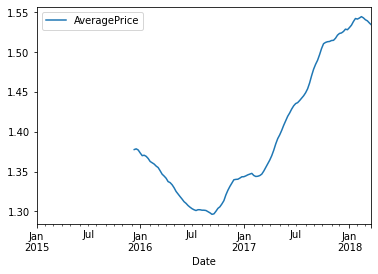

In [ ]:
AveragePrice = avocado_mean.rolling(50).mean()
AveragePrice.plot()

In [ ]:
avocado_ewm = avocado_mean.ewm(span=2).mean()

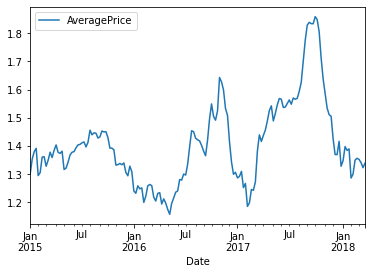

In [ ]:
avocado_ewm.plot()

In [ ]:
avocado_full

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


In [ ]:
organic_chicago = avocado_full.query('type == "organic" and region == "Chicago"')

In [ ]:
ax_roll = organic_chicago.AveragePrice.rolling(4).mean()
ax_exp  = organic_chicago.AveragePrice.ewm(span=4).mean()

In [ ]:
ax_exp = pd.DataFrame(ax_exp)
ax_roll = pd.DataFrame(ax_roll)
ax_exp

,AveragePrice
Date,
2015-01-04,1.490000
2015-01-11,1.677500
2015-01-18,1.745102
2015-01-25,1.784118
2015-02-01,1.669563
...,...
2018-02-25,1.676654
2018-03-04,1.653992
2018-03-11,1.656395


In [ ]:
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize':(12,6)}
        )

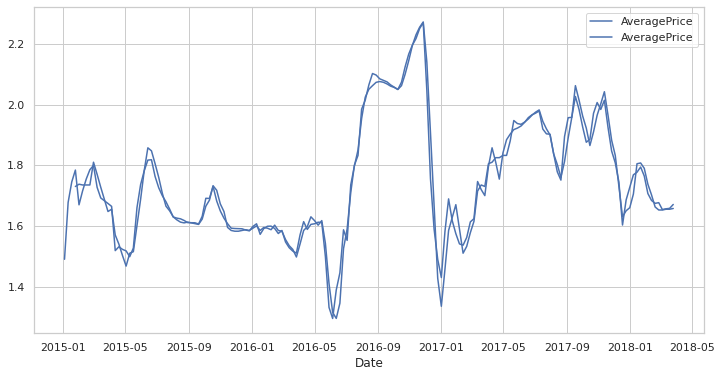

In [ ]:
sns.lineplot(data=ax_roll, color='red')
sns.lineplot(data=ax_exp)

In [ ]:
# px.line(ax_exp, x=ax_exp.index, y='AveragePrice')
px.line(ax_roll, x=ax_roll.index, y='AveragePrice')

In [ ]:
# 💀 Сложное задание! 💀

# Далее будем работать с данными по опозданиям в заключении сделок!

# В файле находится информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали. Пример сабсэта данных:

# client_id	company_id	delay	revenue
# 0	2389	4240	-1 days -14:57:48.000000000	705436
# 1	7614	9544	-4 days -02:14:23.000000000	859266
# 2	2052	2427	-0 days -06:08:57.000000000	812416
# 3	9635	8054	-0 days -23:40:19.000000000	162312
# 4	8154	5503	-1 days -13:21:53.000000000	658844

# Запишите данные из файла в переменную df. Далее переведите delay в timedelta формат. Обратите внимание, что так просто столбец не переведётся – нужно будет убрать -.

# NB! Данные уже записаны в переменную df.

# Могут понадобиться:

# pd.to_timedelta()
# pd.Series.str

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Karpov/lesson_6/delays.csv')
df

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844
...,...,...,...,...
259,5837,2617,-0 days -05:32:08.000000000,602129
260,2384,2364,-3 days -23:27:14.000000000,910660
261,5146,3331,-1 days -15:22:34.000000000,401137
262,7203,5532,-2 days -17:15:02.000000000,308979


In [ ]:
df.delay = df.delay.str.replace('-', '')
df.delay = pd.to_timedelta(df.delay)

In [ ]:
 df['delay_categorical'] = pd.cut(df.delay, bins=3)

In [ ]:
df

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
260,2384,2364,3 days 23:27:14,910660,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
261,5146,3331,1 days 15:22:34,401137,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
262,7203,5532,2 days 17:15:02,308979,"(1 days 16:19:58.666666666, 3 days 08:05:36.33..."


In [ ]:
# 💀 Сложное задание! 💀
# Разбилось конечно неплохо, но хочется чуть более целые значения и более человеческие названия.
# В этом нам помогут аргументы функции pd.cut! Перезадайте колонку delay_categorical, чтобы значения в ней были:

# 'less than 1 day' – время от 0 до 1 дня
# '1-2 days' – от 1 до 2 дней
# '2-3 days' – от 2 до 3 дней
#  'more than 3 days' – больше 3 дней

In [ ]:
bins = pd.to_timedelta(['0d', '1d', '2d', '3d', '10000d'])
labels = ['less than 1 day', '1-2 days','2-3 days', 'more than 3 days']
df['delay_categorical'] = pd.cut(df.delay, bins=bins, labels=labels)

In [ ]:
# Прекрасно! Теперь постройте интерактивный барплот с тем, насколько часто задерживаются сделки.
# Отсортируйте варианты так, чтобы снизу был самый редкий, а сверху – самый частый.

ax = df.groupby('delay_categorical', as_index=False) \
  .agg({'revenue': 'count'}) \
  .rename(columns={'revenue': 'frq'}) \
  .sort_values('frq')
px.bar(x=ax.delay_categorical, y=ax.frq)

In [ ]:
ax

,delay_categorical,frq
2,2-3 days,47
1,1-2 days,51
0,less than 1 day,59
3,more than 3 days,107


In [ ]:
ads_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Karpov/lesson_6/ads_data.csv', parse_dates=['date', 'time'])
ads_clients_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Karpov/lesson_6/ads_clients_data.csv', parse_dates=['create_date', 'date'])

In [ ]:
# Посмотрим Na значения
ads_data.isna().sum()

date                     0
time                     0
event                    0
platform                 0
ad_id                    0
client_union_id          0
campaign_union_id        0
ad_cost_type             0
ad_cost                  0
has_video                0
target_audience_count    0
dtype: int64

In [ ]:
ads_data

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [ ]:
# Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям.
# Тонкий момент: помните, что некоторые показываемые объявления не кликались, и при группировке в таких случаях не будет строк с кликами, 
# а для подсчёта среднего по объявлениям их нужно учитывать. Округлите ответы до целых чисел.

In [ ]:
# Всего объявлений
total_ads=ads_data.ad_id.nunique()

In [ ]:
ads_data.groupby(['ad_id', 'event'], as_index=False) \
        .agg({'platform': 'count'}) \
        .rename(columns={'platform': 'count'}) \
        .pivot(index='ad_id', columns='event', values='count') \
        .fillna(0) \
        .mean() \
        .round()

event
click    113.0
view     923.0
dtype: float64

In [ ]:
# Давайте посмотрим на распределение показов объявлений!
  # По оси x – число показов
  # По оси y – доля объявлений с такими показами
# Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения. Выберите соответствующий график:

In [ ]:
views = ads_data.groupby(['ad_id', 'event'], as_index=False) \
        .agg({'platform': 'count'}) \
        .rename(columns={'platform': 'count'}) \
        .pivot(index='ad_id', columns='event', values='count') \
        # .fillna(0)

views
log_views = np.log(views.view)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



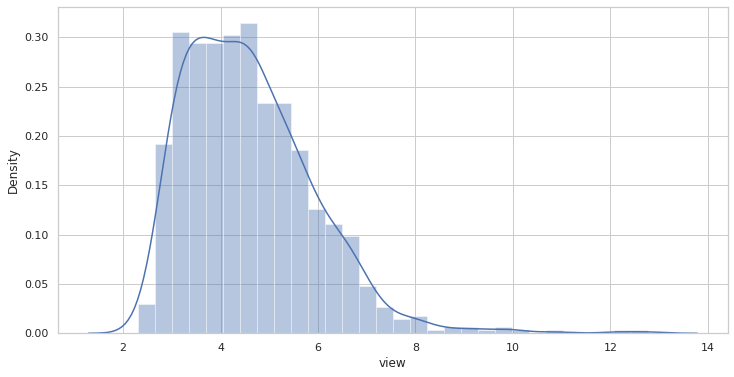

In [ ]:
sns.distplot(log_views)

In [ ]:
# Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням,
# не учитывая объявления, у которых не было показов (обычное среднее).
# После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.

# Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.

In [ ]:
average_views_by_day = ads_data.query('event == "view"')\
  .groupby('date', as_index=False) \
  .agg({'ad_id': 'nunique', 'event':'count'})\
  .rename(columns={'ad_id':'uniq_ads', 'event':'event_number'})

In [ ]:
average_views_by_day['average'] = average_views_by_day.event_number / average_views_by_day.uniq_ads

In [ ]:
average_views_by_day['rolling'] = average_views_by_day.average.rolling(2).mean()

In [ ]:
average_views_by_day

,date,uniq_ads,event_number,average,rolling
0,2019-04-01,141,21782,154.482270,NaN
1,2019-04-02,338,46572,137.786982,146.134626
2,2019-04-03,360,59023,163.952778,150.869880
3,2019-04-04,407,275092,675.901720,419.927249
4,2019-04-05,465,427386,919.109677,797.505699
5,2019-04-06,220,60967,277.122727,598.116202


In [ ]:
# Здесь не нужно исхитряться как в 1-ом задании, так как нам не нужно учитывать объявления, у которых не было просмотров. 
# Отберите только просмотры, сгруппируйте данные по объявлениям и дням и посчитайте число просмотров для каждого объявления (`ad_id`) в каждый день (`date`). 
# После этого произведите группировку по дням и посчитайте среднее число просмотров для каждого дня. Потом посчитайте скользящее среднее с помощью `rolling`

In [ ]:
# 2 вариант среднего
ads_data.query('event == "view"')\
  .groupby(['ad_id', 'date'], as_index=False)\
  .agg({'event':'count'})\
  .groupby('date')\
  .agg({'event':'mean'})\

,event
date,
2019-04-01,154.482270
2019-04-02,137.786982
2019-04-03,163.952778
2019-04-04,675.901720
2019-04-05,919.109677
2019-04-06,277.122727


In [ ]:
# И еще 3 вариант среднего
ads_data.query('event == "view"')\
  .groupby(['date', 'ad_id']) \
  .agg({'event':'count'})\
  .groupby('date')\
  .agg({'event':'mean'})\


,event
date,
2019-04-01,154.482270
2019-04-02,137.786982
2019-04-03,163.952778
2019-04-04,675.901720
2019-04-05,919.109677
2019-04-06,277.122727


In [ ]:
average_views_by_day.fillna(0)
average_views_by_day['diff'] = average_views_by_day['average'] - average_views_by_day['rolling']

In [ ]:
average_views_by_day

,date,uniq_ads,event_number,average,rolling,diff
0,2019-04-01,141,21782,154.482270,NaN,NaN
1,2019-04-02,338,46572,137.786982,146.134626,-8.347644
2,2019-04-03,360,59023,163.952778,150.869880,13.082898
3,2019-04-04,407,275092,675.901720,419.927249,255.974471
4,2019-04-05,465,427386,919.109677,797.505699,121.603979
5,2019-04-06,220,60967,277.122727,598.116202,-320.993475


In [ ]:
# Ну а теперь найдём проблемное объявление (с наибольшим/наименьшим количеством показов) в день, 
# в который была замечена самая большая по модулю аномалия. 
# То есть нужно переиспользовать предыдущий датафрейм и найти среди данных рекламы в тот день объявление 
# с наибольшим или наименьшим числом показов.Потом напишите функцию, которая будет искать такое объявление в датасете.

# В ответе укажите id проблемного объявления в день, полученный на предыдущем шаге.

In [ ]:
ads_data.query('event == "view" and date == "2019-04-06"')\
  .groupby('ad_id', as_index=False) \
  .agg({'event':'count'})\
  .sort_values('event')
  # .rename(columns={'ad_id':'uniq_ads', 'event':'event_number'})

,ad_id,event
164,106809,1
156,98274,1
28,18681,1
84,35615,1
62,27581,1
...,...,...
26,18425,426
90,37720,835
95,38892,1337
65,28142,3280


In [ ]:
# Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней от даты создания рекламного клиента (create_date)
#  и первым запуском рекламного объявления этим клиентом (date).

# В качестве ответа укажите среднее число дней.

In [ ]:
ads_clients_data

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


In [ ]:
ads = ads_data.merge(ads_clients_data, how='left', on='client_union_id')

In [ ]:
ads.dtypes

date_x                   datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
date_y                   datetime64[ns]
community_id                      int64
create_date              datetime64[ns]
dtype: object

In [ ]:
ads['delta'] = ads['date_x'] - ads['create_date']
ads.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,delta
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,2020-05-07,-130337958,2018-12-25,97 days
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,2020-05-07,-130393498,2018-11-13,139 days
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,2020-05-07,-130929771,2018-08-18,226 days
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,2020-05-07,-130021201,2019-02-22,38 days


In [ ]:
ads.groupby('client_union_id')\
  .agg({'delta':'min'})\
  .sort_values('delta')\
  .delta.mean()

Timedelta('124 days 09:04:43.532219570')

In [ ]:
# 💀 Сложное задание! 💀

# Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

# Конверсия – отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов.
# Например, 1000 клиентов создали кабинет, но лишь 50 из них запустили рекламу. В таком случае конверсия будет равна 5%

# Чтобы отобрать данные за нужный промежуток, можно воспользоваться сравнением времени до создания первой рекламы с pd.Timedelta(365, unit='day'))

# Ответ дайте в процентах и округлите до сотых. Пример ответа:

In [ ]:
total_clients = ads.client_union_id.nunique()
total_clients

838

In [ ]:
ads['less_year'] = ads.delta < '365d'
# pd.to_timedelta(ads.delta)

In [ ]:
ads.query('less_year')


,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,delta,less_year
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days,True
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,2020-05-07,-130337958,2018-12-25,97 days,True
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,2020-05-07,-130393498,2018-11-13,139 days,True
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,2020-05-07,-130929771,2018-08-18,226 days,True
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,2020-05-07,-130021201,2019-02-22,38 days,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392,2020-05-07,-130473199,2019-01-29,66 days,True
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392,2020-05-07,-130473199,2019-01-29,66 days,True
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392,2020-05-07,-130473199,2019-01-29,66 days,True
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929,2020-05-07,-130507449,2018-10-19,168 days,True


In [ ]:
ads_clients_data.client_union_id.nunique()

122078

In [ ]:
total_clients / 122078*100


0.6864463703533806

In [ ]:
# Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.

# Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).
# Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365]. Создать временные промежутки можно с помощью pd.to_timedelta().

In [ ]:
ads.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,delta,less_year
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days,True
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,2020-05-07,-130337958,2018-12-25,97 days,True
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,2020-05-07,-130393498,2018-11-13,139 days,True
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,2020-05-07,-130929771,2018-08-18,226 days,True
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,2020-05-07,-130021201,2019-02-22,38 days,True


In [ ]:
bins_by_month = pd.to_timedelta(['0d', '30d', '90d', '180d', '365d'])
labels_by_month = ['less than moth', '1-3 month','4-6 month', '7-12 month']
ads['delay_by_month'] = pd.cut(ads.delta, bins=bins_by_month, labels=labels_by_month)

In [ ]:
ads.query('delay_by_month == "less than moth"')\
  .groupby('client_union_id', as_index=False)\
  .agg({'event':'count'})\
  .shape

(11, 2)

In [ ]:
ads.groupby(['delay_by_month'], as_index=False)\
  .agg({'client_union_id':'nunique'})\
  .rename(columns={'client_union_id':'uniqs'})\
  .sort_values('uniqs')

,delay_by_month,uniqs
0,less than moth,11
3,7-12 month,169
1,1-3 month,265
2,4-6 month,399
